In [6]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from puzzle import *
import global_values
from displaying import *
from groups import *

# rotated = np.rot90(arr, k=3)  # 1 CCW rotation = 3 CW

In [7]:
image_path = "disney_puzzle/aladin.jpg" 
# image_path = "angry.jpg"
output_folder = "fragments"
global_values.COL_NR = 8
global_values.ROW_NR = 8
fragments, tile_h, tile_w = divide_image(image_path, output_folder, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

sides_comparisons = create_sides_comparisons(fragments)



sorted_sides_comparisons = sort_sides_comparisons(sides_comparisons)

n = len(fragments)
s = 4  
global_values.SYMMETRIC_COMPARISONS = [[[[None for _ in range(s)] for _ in range(s)] for _ in range(n)] for _ in range(n)]

for c in sides_comparisons:
    global_values.SYMMETRIC_COMPARISONS[c.side1.fragment_idx][c.side2.fragment_idx][c.side1.side_idx][c.side2.side_idx] = c
    symmetric_comp = SidesComparison(fragments, c.side2, c.side1)
    global_values.SYMMETRIC_COMPARISONS[c.side2.fragment_idx][c.side1.fragment_idx][c.side2.side_idx][c.side1.side_idx] = symmetric_comp



Rotations by fragment: 0:0, 1:2, 2:2, 3:1, 4:0, 5:2, 6:2, 7:1, 8:3, 9:2, 10:3, 11:1, 12:2, 13:2, 14:2, 15:2, 16:2, 17:3, 18:0, 19:0, 20:1, 21:0, 22:2, 23:3, 24:1, 25:0, 26:1, 27:0, 28:0, 29:2, 30:1, 31:3, 32:0, 33:2, 34:3, 35:1, 36:1, 37:2, 38:1, 39:2, 40:1, 41:0, 42:1, 43:0, 44:1, 45:0, 46:2, 47:1, 48:1, 49:2, 50:2, 51:1, 52:0, 53:0, 54:0, 55:0, 56:3, 57:3, 58:3, 59:1, 60:3, 61:2, 62:0, 63:1


100%|██████████| 63/63 [00:02<00:00, 21.08it/s]


In [8]:
groups = []
fragment_idx_to_group_idx = [None for _ in fragments]

for fr_idx in range(len(fragments)):
    new_group = Group(fr_idx)
    groups.append(new_group)
    fragment_idx_to_group_idx[fr_idx] = fr_idx
# show_all_groups(groups, fragments)
print(fragment_idx_to_group_idx)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


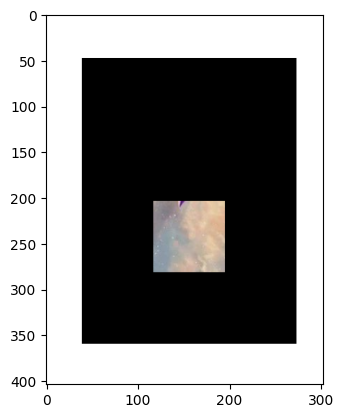

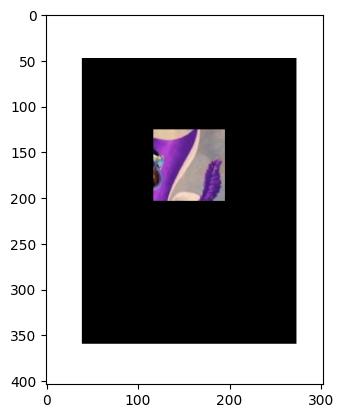

-------------------------------------------


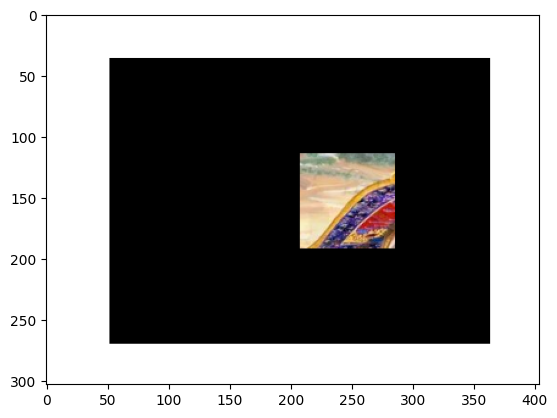

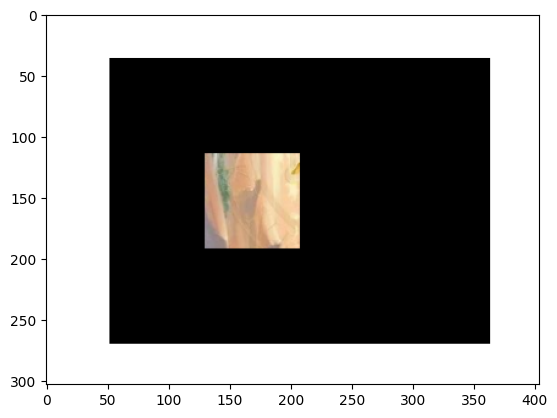

-------------------------------------------


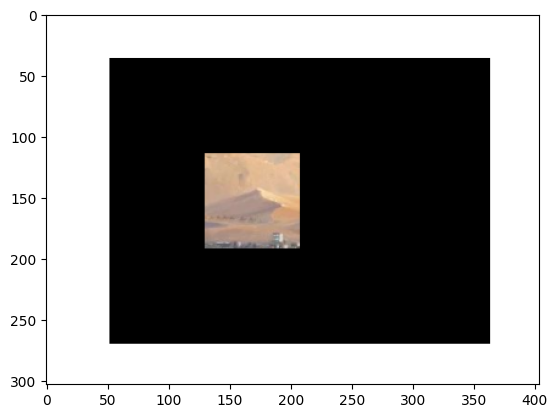

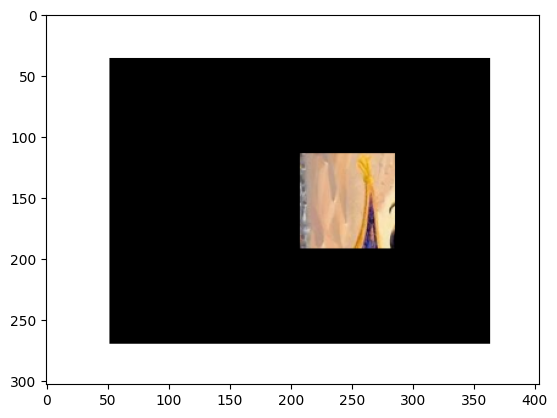

-------------------------------------------


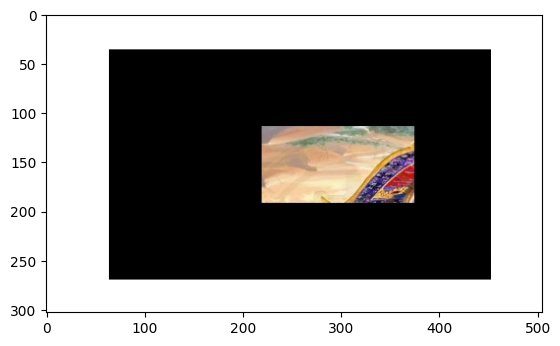

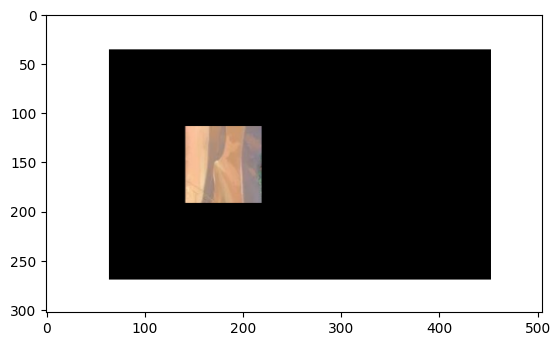

-------------------------------------------


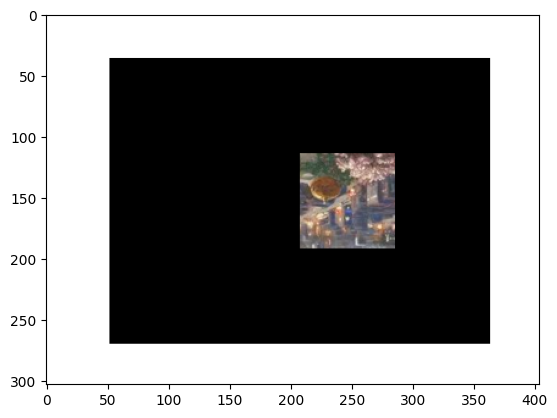

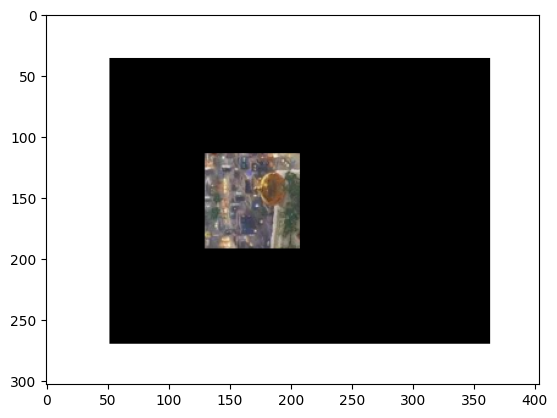

-------------------------------------------


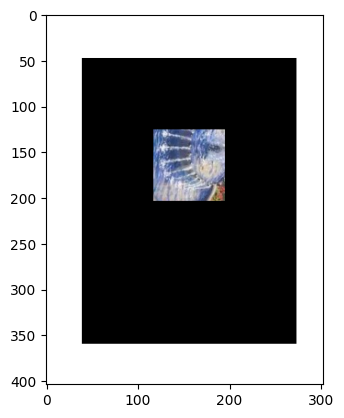

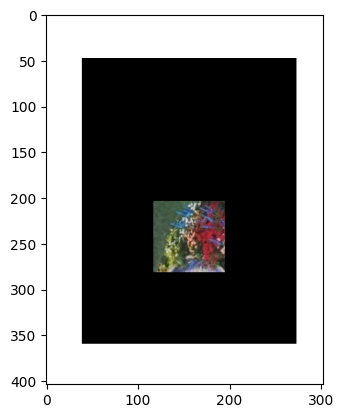

-------------------------------------------


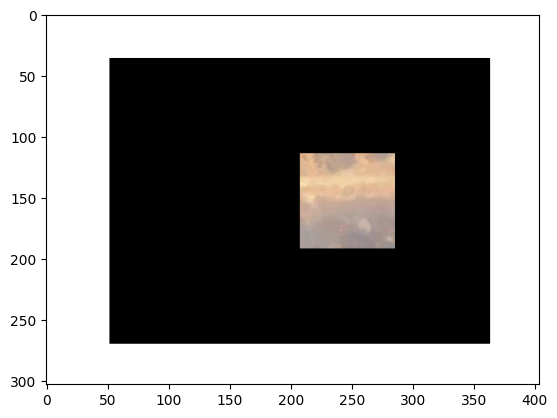

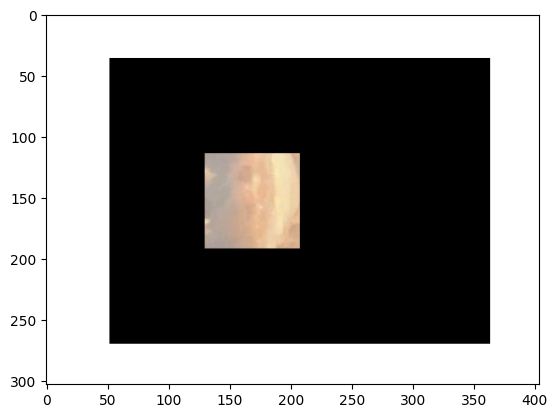

-------------------------------------------


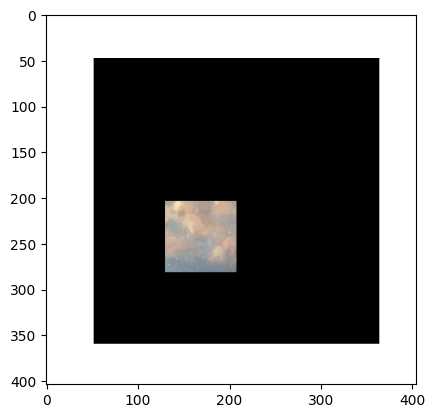

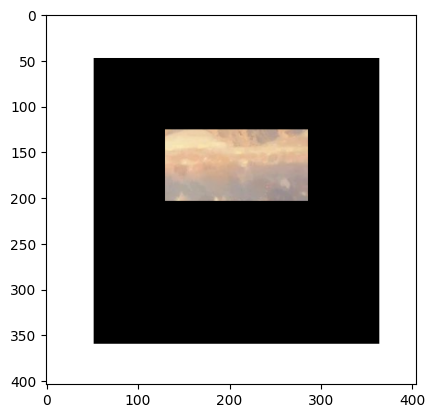

-------------------------------------------


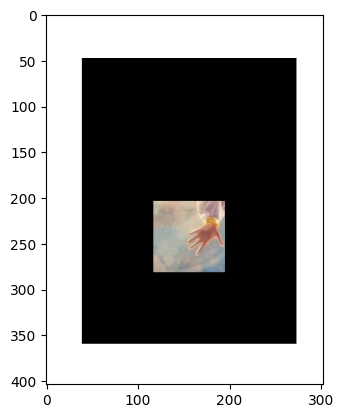

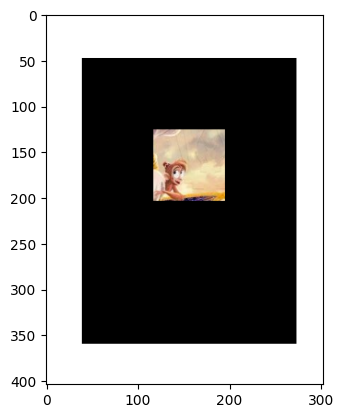

-------------------------------------------


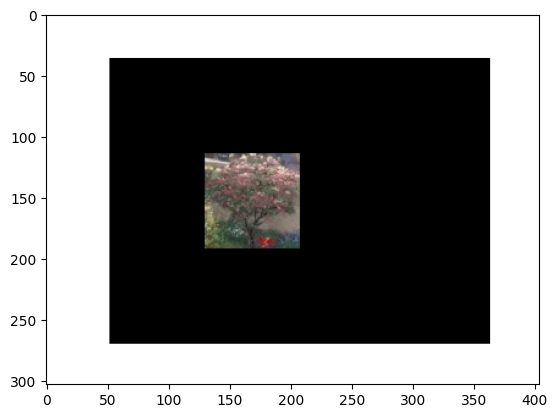

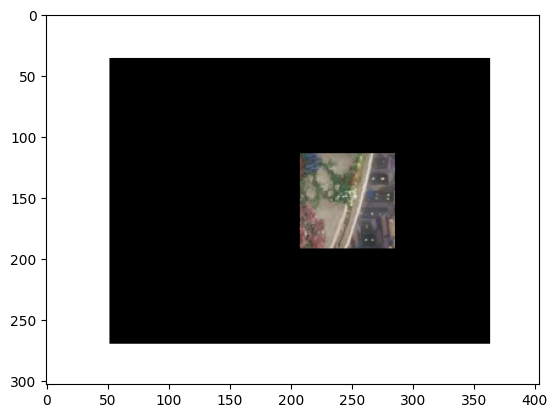

-------------------------------------------


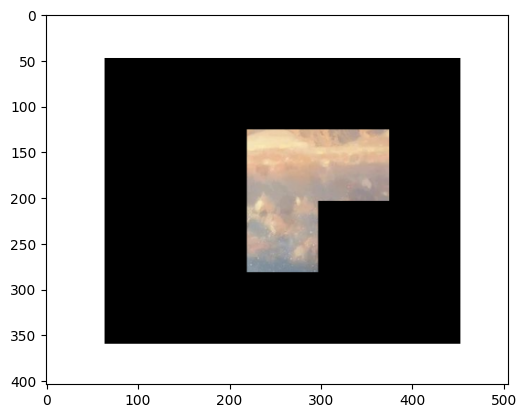

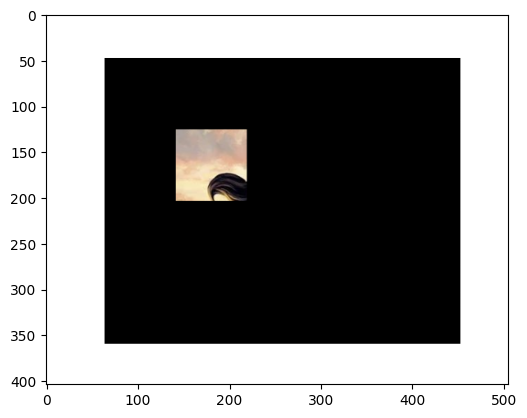

-------------------------------------------


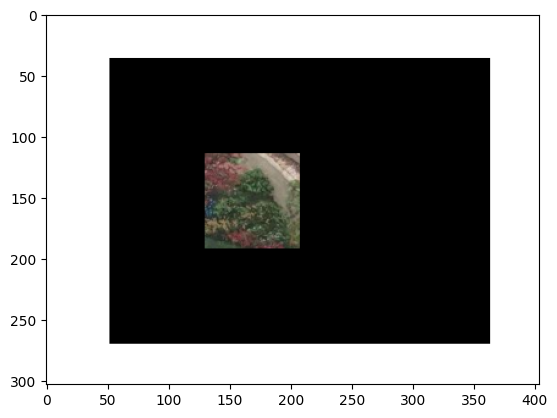

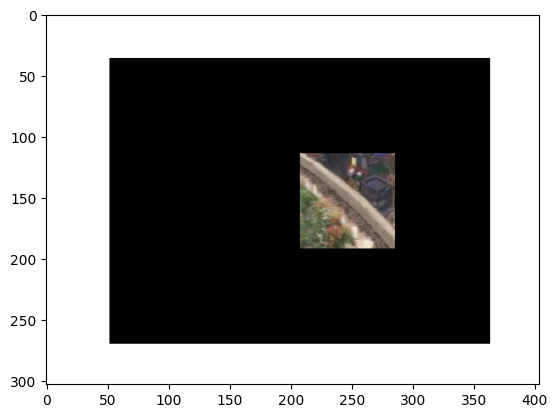

-------------------------------------------


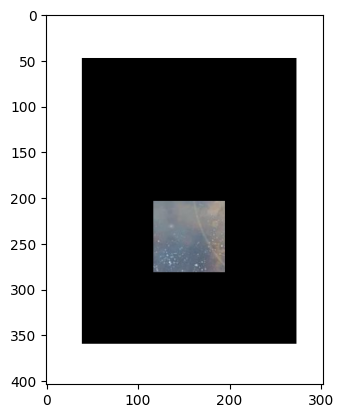

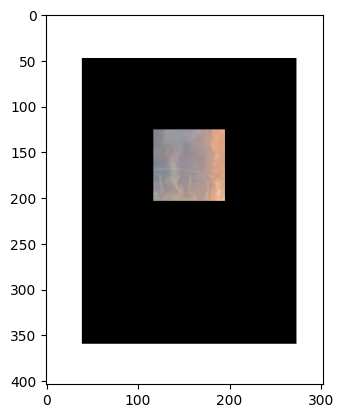

-------------------------------------------


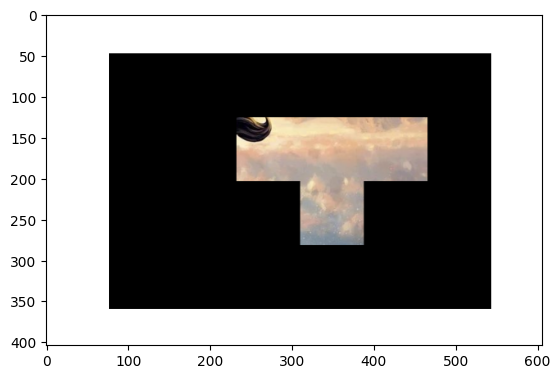

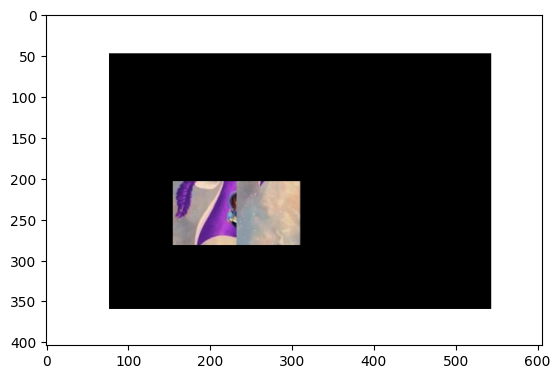

-------------------------------------------


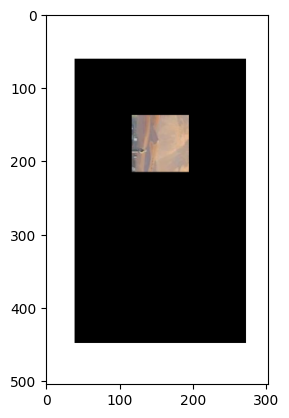

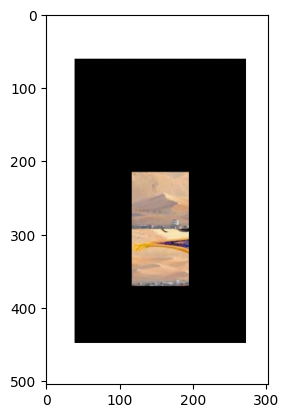

-------------------------------------------


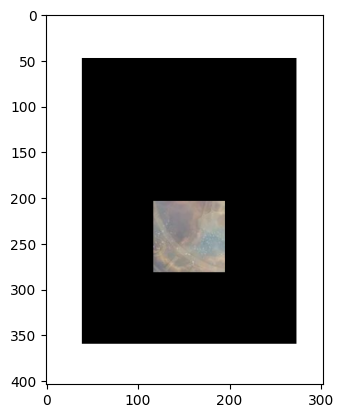

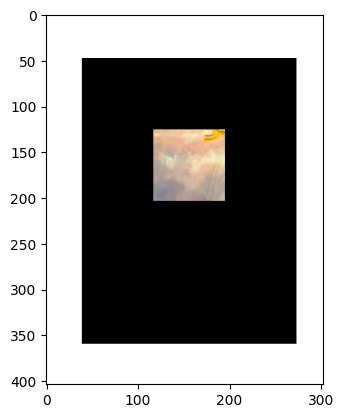

-------------------------------------------


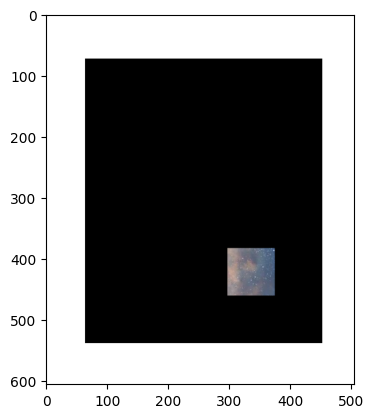

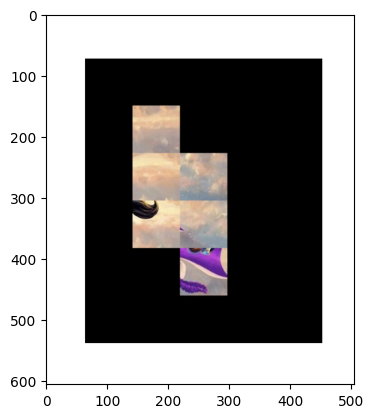

-------------------------------------------


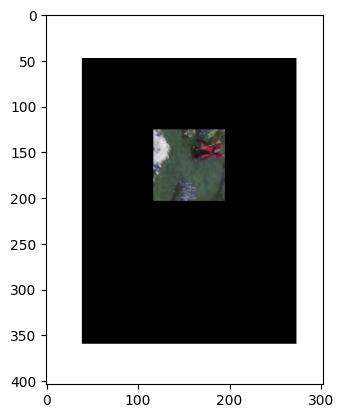

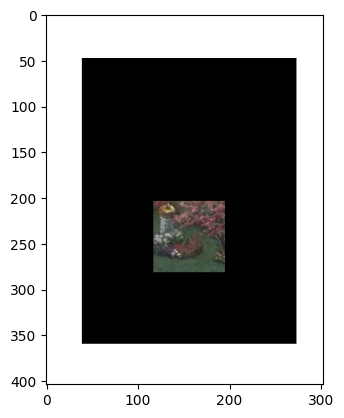

-------------------------------------------


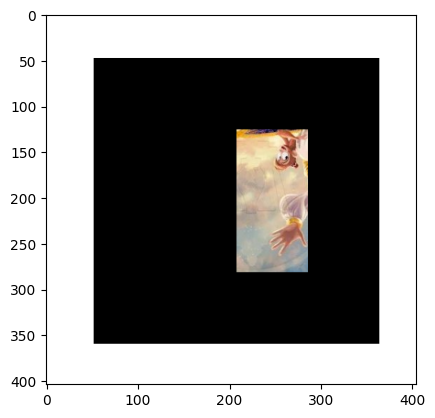

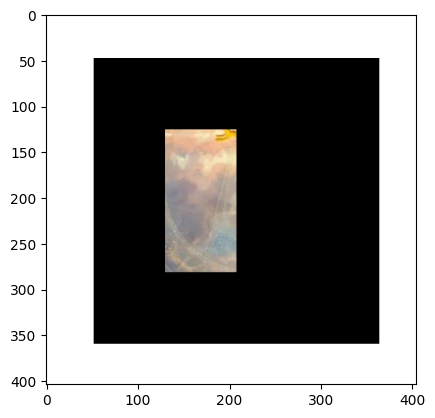

-------------------------------------------


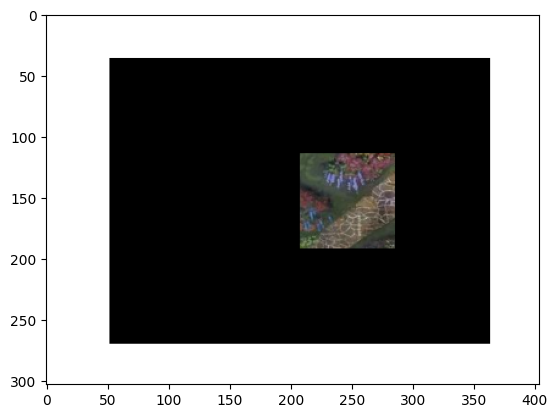

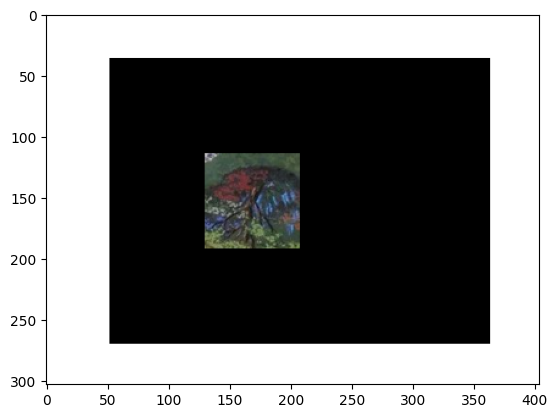

-------------------------------------------


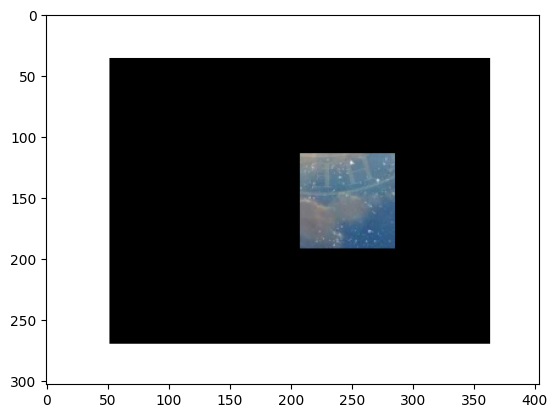

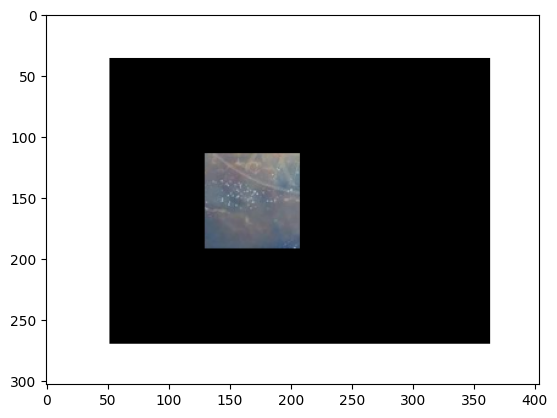

-------------------------------------------


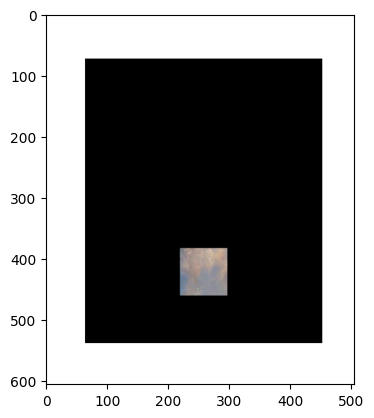

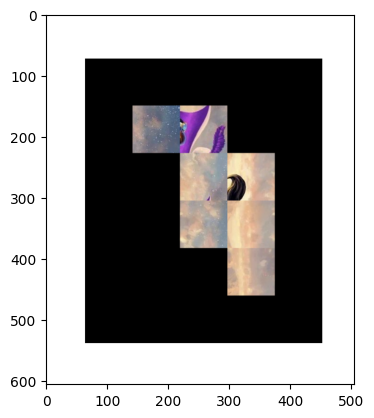

-------------------------------------------


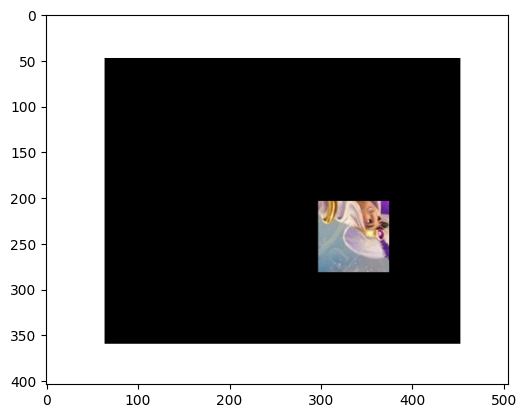

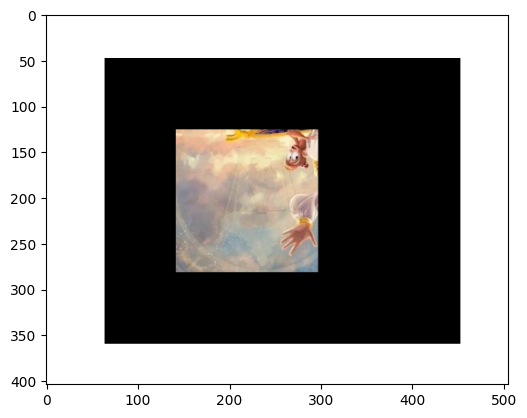

-------------------------------------------


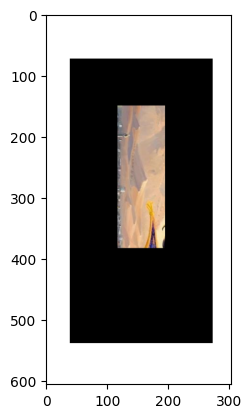

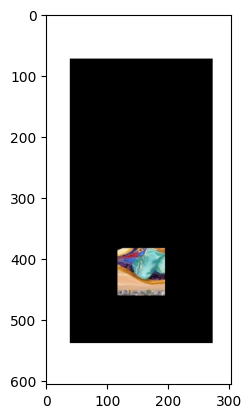

-------------------------------------------


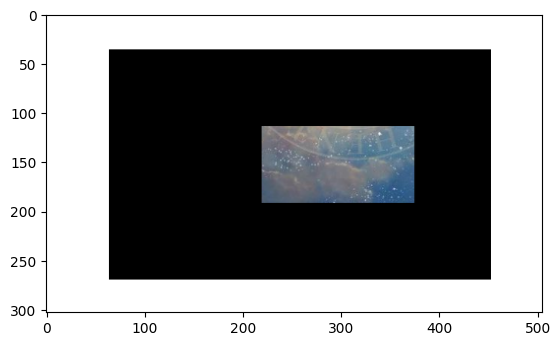

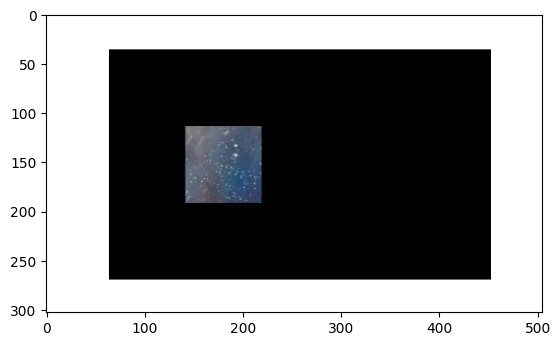

-------------------------------------------


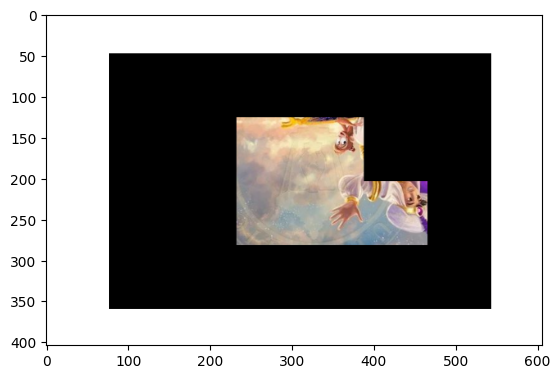

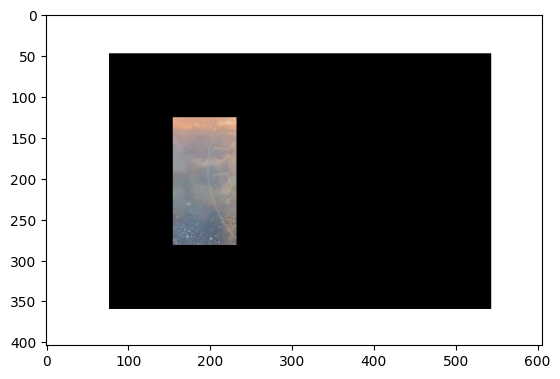

-------------------------------------------


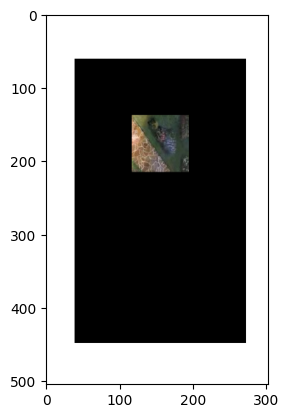

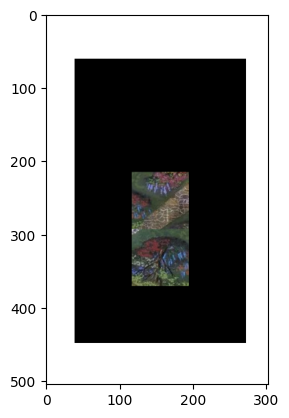

-------------------------------------------


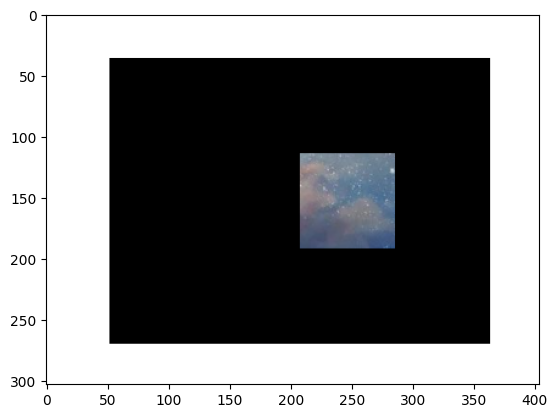

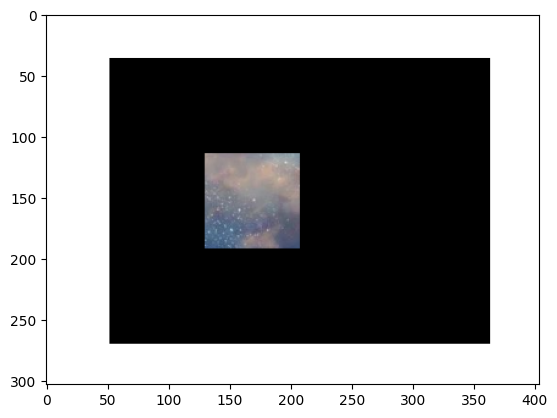

-------------------------------------------


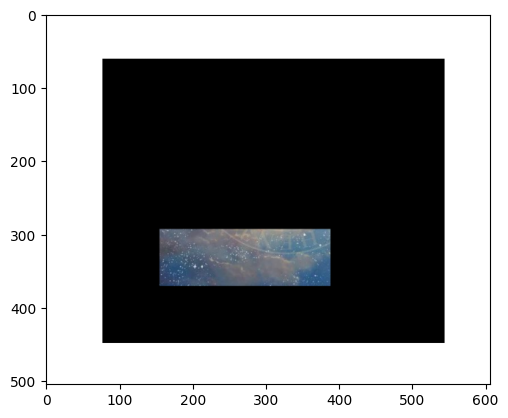

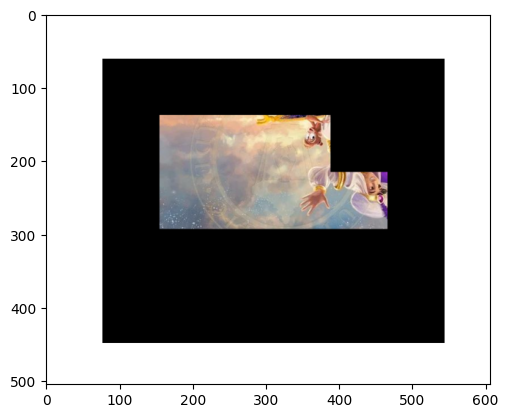

-------------------------------------------


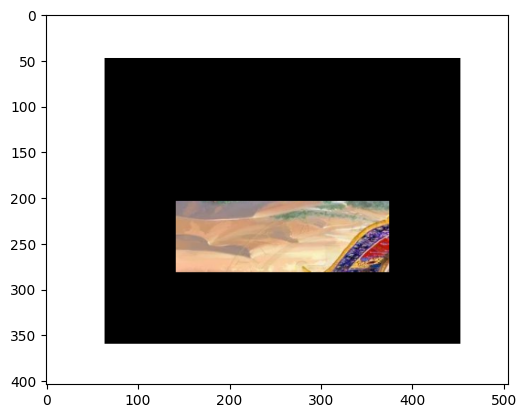

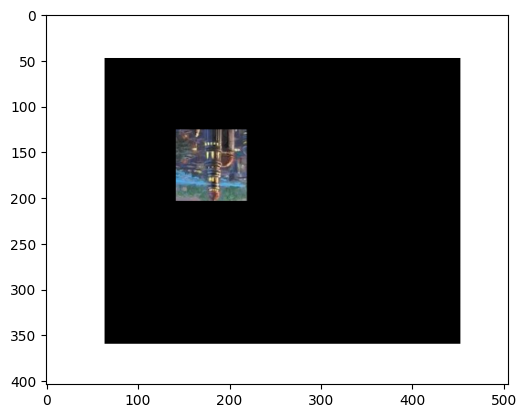

-------------------------------------------


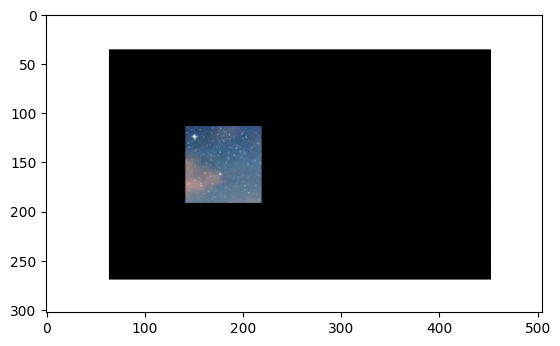

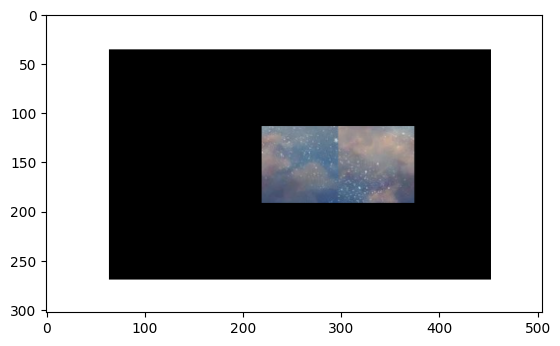

-------------------------------------------


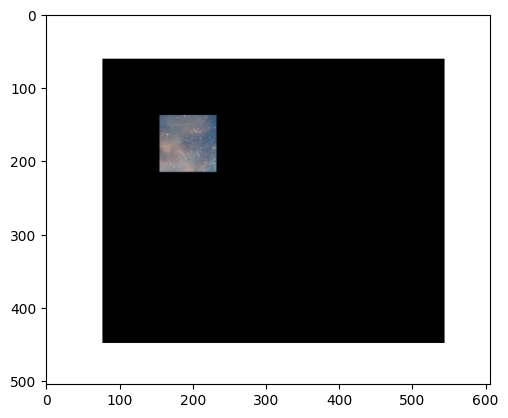

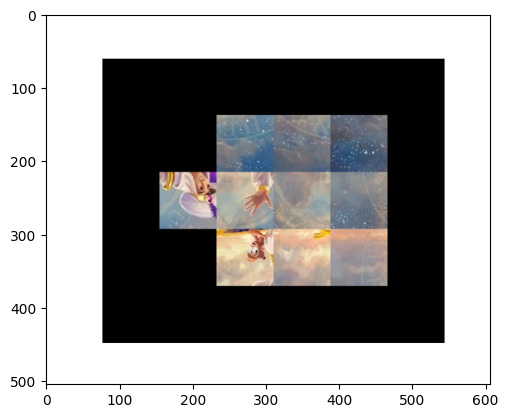

-------------------------------------------


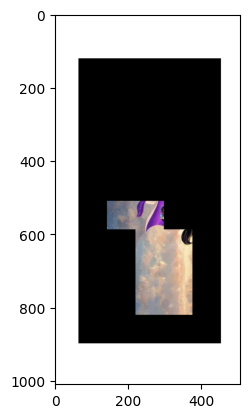

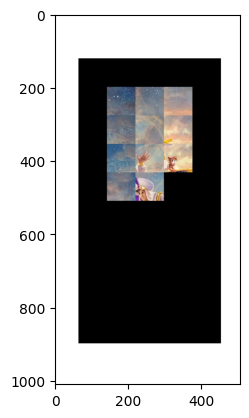

-------------------------------------------


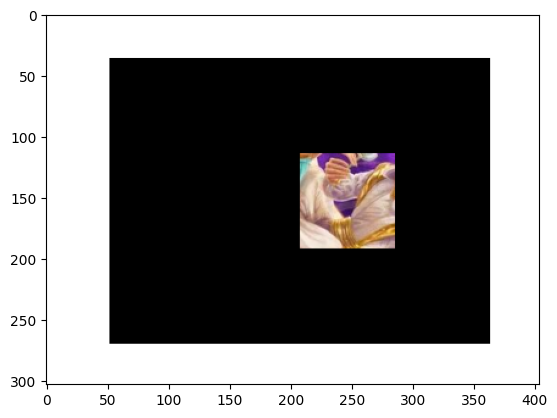

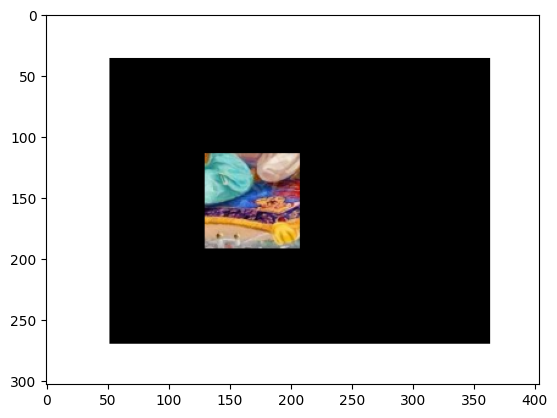

-------------------------------------------


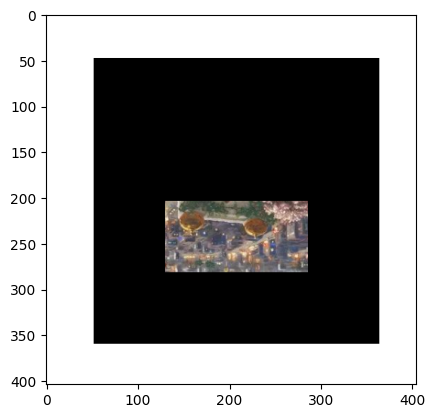

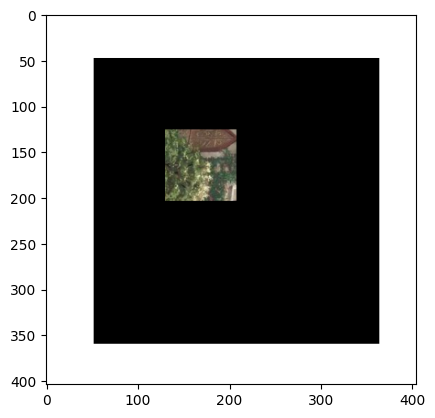

-------------------------------------------


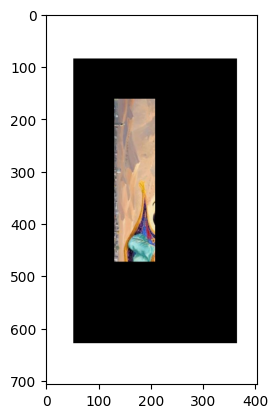

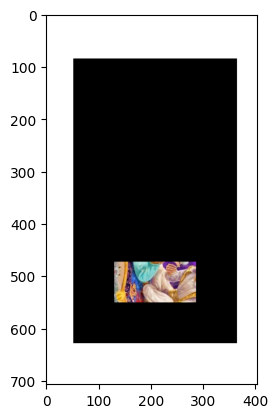

-------------------------------------------


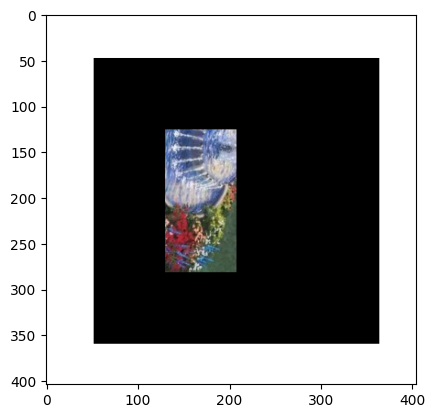

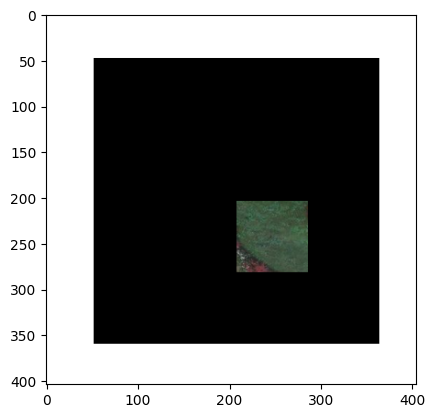

-------------------------------------------


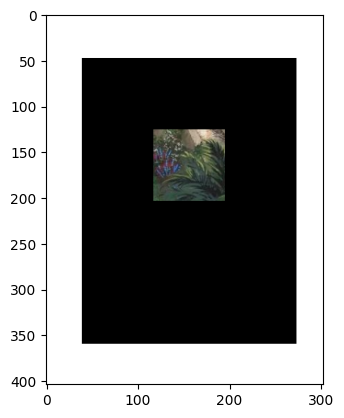

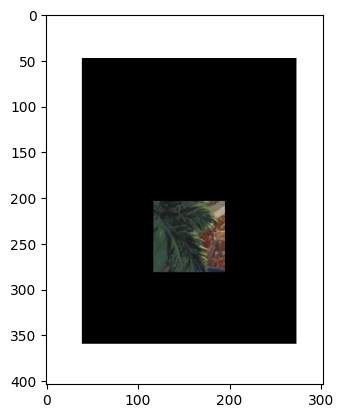

-------------------------------------------


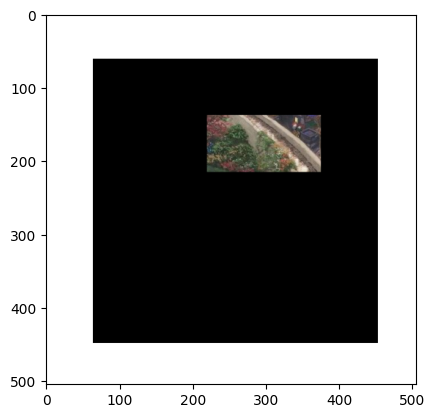

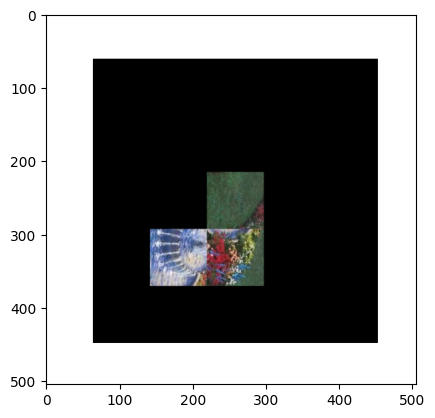

-------------------------------------------


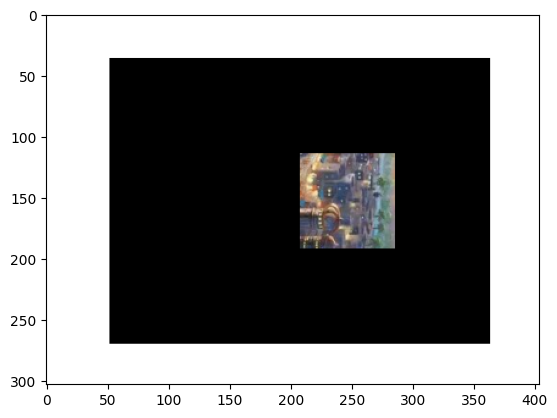

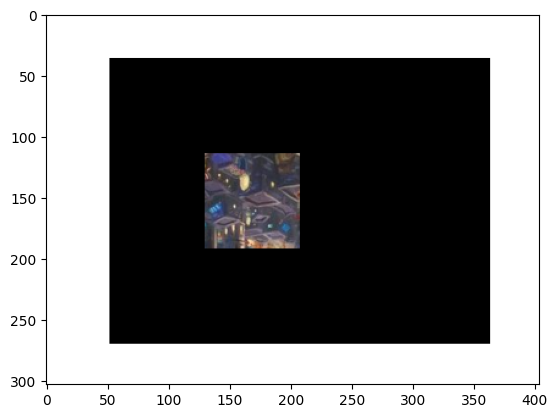

-------------------------------------------


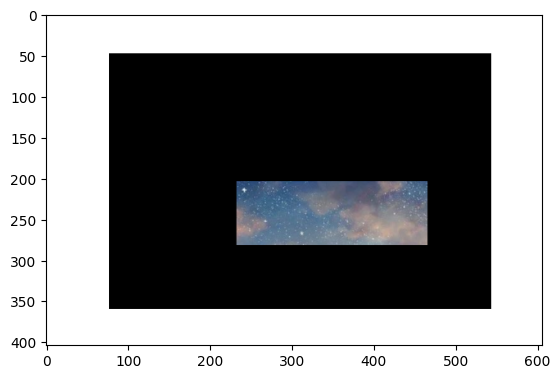

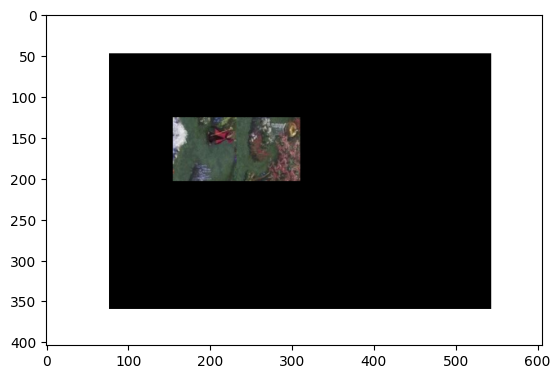

-------------------------------------------


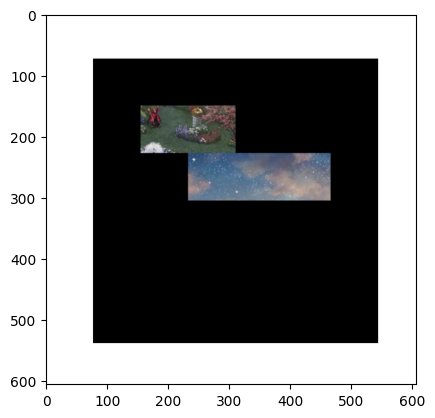

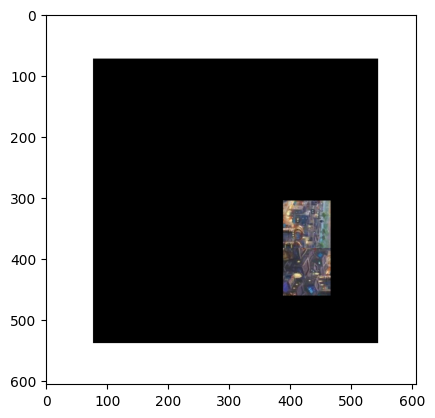

-------------------------------------------


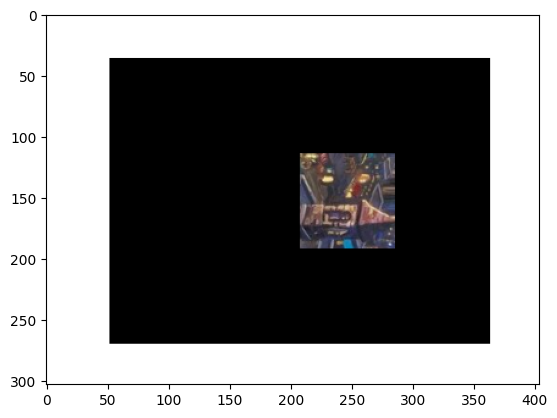

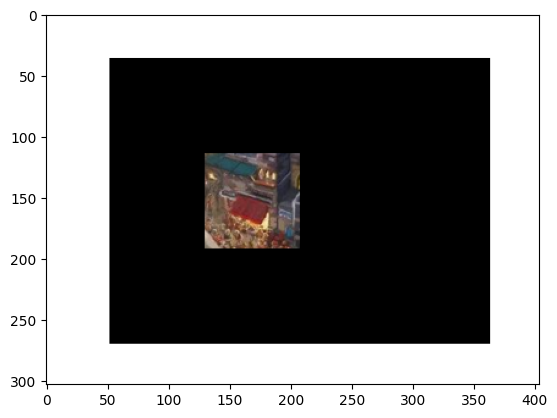

-------------------------------------------


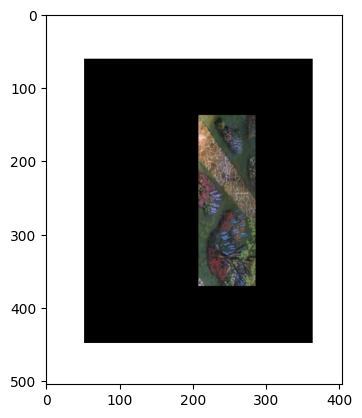

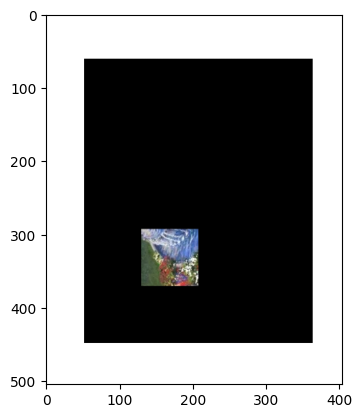

-------------------------------------------


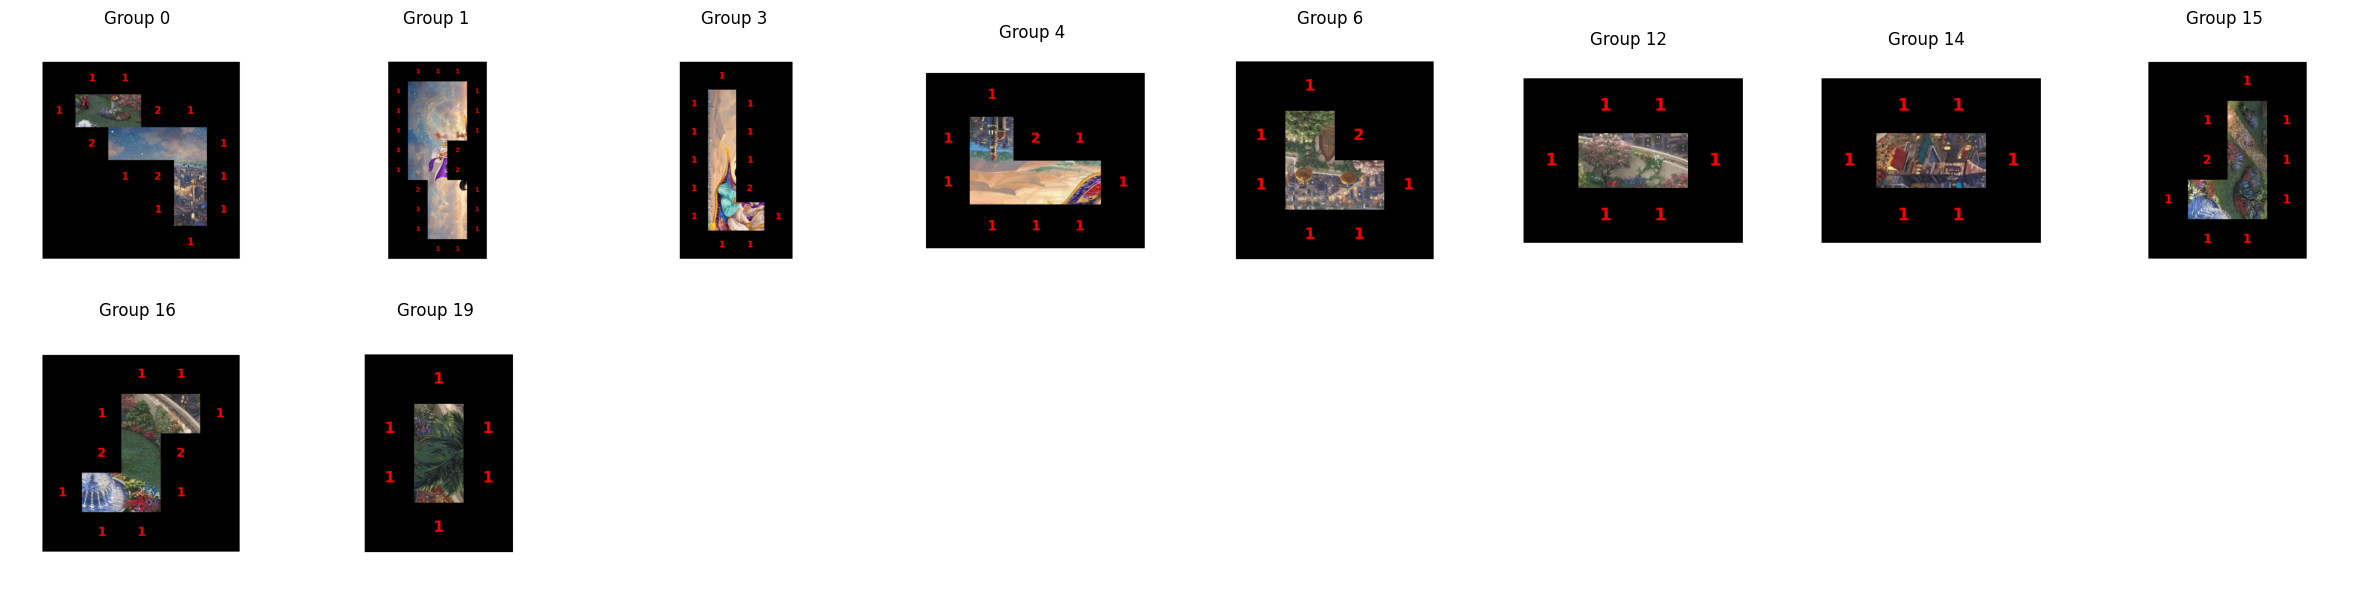

In [9]:
for comp in sorted_sides_comparisons:
    if comp.score <= global_values.IMAGE_TH:

        anchor_fragment_idx = comp.side1.fragment_idx
        pasted_fragment_idx = comp.side2.fragment_idx
        anchor_group_idx = fragment_idx_to_group_idx[anchor_fragment_idx]
        pasted_group_idx = fragment_idx_to_group_idx[pasted_fragment_idx]

        if anchor_group_idx != pasted_group_idx:

            shifted_anchor_group, shifted_pasted_group, pasted_group_additional_rotation = simulate_merge_positions(fragments, comp, groups[anchor_group_idx], groups[pasted_group_idx])

            if does_merge_fit_within_bounds(shifted_anchor_group):
                if check_groups_shapes_for_merging(shifted_anchor_group, shifted_pasted_group):
                    # print(f"{comp}")

                    if check_all_group_matchings_scores(fragments, pasted_group_additional_rotation, shifted_anchor_group, shifted_pasted_group):    
                    # score = calculate_all_group_matchings_scores(shifted_anchor_group, shifted_pasted_group)
                        anchor_img = shifted_anchor_group.show_group(fragments)
                        pasted_img = shifted_pasted_group.show_group(fragments)

                        plt.imshow(anchor_img)
                        plt.show()
                        plt.imshow(pasted_img)
                        plt.show()
                        print("-------------------------------------------")
                        groups[anchor_group_idx] = merge_groups(fragments, pasted_group_additional_rotation, shifted_anchor_group, shifted_pasted_group, fragment_idx_to_group_idx)
                        update_after_merge(groups, fragments, fragment_idx_to_group_idx, pasted_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 1)

# for g in groups:
#     print(g.fragment_positions)


Merged group 1 and 2 with total score: 11.52863214527506 using: Sides Comp: Score=0.034087825798111634 Fragment_idx1=18, Side_idx1=1; fragment_idx2=19, side_idx2=3
before merge
used fragments anchor: fragment indexes used: [8, 3, 9, 16, 17, 18, 10, 11, 4, 5, 6, 7, 12, 13, 21, 14, 22, 15, 23] at positions: {8: [8, 2], 3: [5, 1], 9: [7, 2], 16: [8, 3], 17: [7, 3], 18: [6, 3], 10: [6, 2], 11: [5, 2], 4: [4, 1], 5: [3, 1], 6: [2, 1], 7: [1, 1], 12: [4, 2], 13: [3, 2], 21: [3, 3], 14: [2, 2], 22: [2, 3], 15: [1, 2], 23: [1, 3]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [6, 3], 63: [5, 3]}
simulating merge:


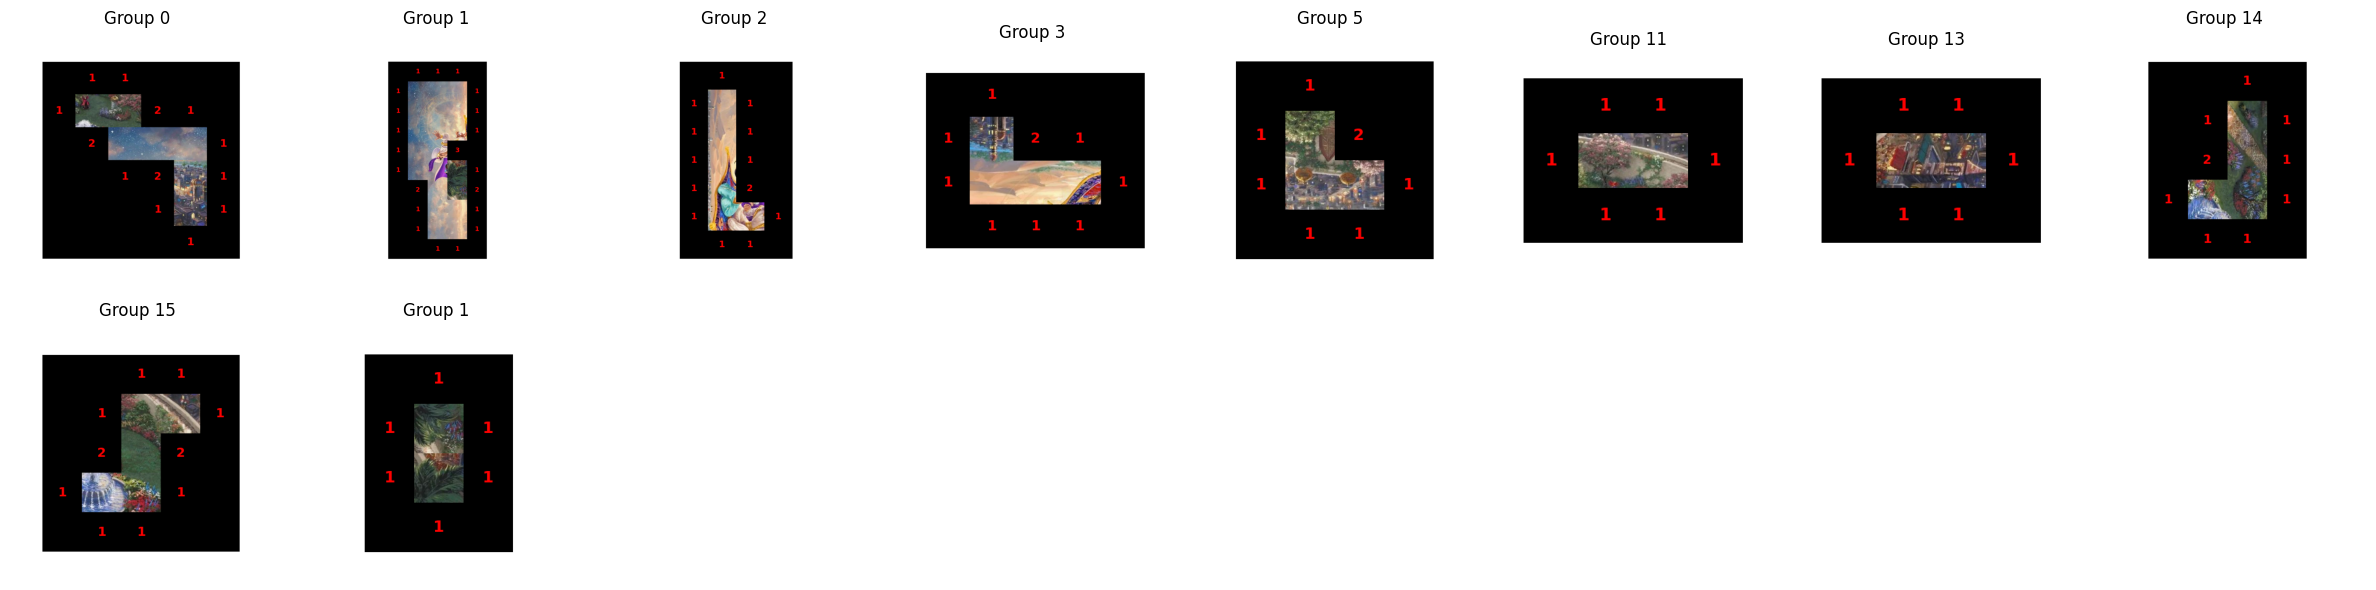

after merge
used fragments anchor: fragment indexes used: [8, 3, 9, 16, 17, 18, 10, 11, 4, 5, 6, 7, 12, 13, 21, 14, 22, 15, 23, 62, 63] at positions: {8: [8, 2], 3: [5, 1], 9: [7, 2], 16: [8, 3], 17: [7, 3], 18: [6, 3], 10: [6, 2], 11: [5, 2], 4: [4, 1], 5: [3, 1], 6: [2, 1], 7: [1, 1], 12: [4, 2], 13: [3, 2], 21: [3, 3], 14: [2, 2], 22: [2, 3], 15: [1, 2], 23: [1, 3], 62: [6, 3], 63: [5, 3]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [6, 3], 63: [5, 3]}
--------------------------------------------------------------------------------------------------------------
Merged group 1 and 2 with total score: 4.3468546742821724e+27 using: Sides Comp: Score=1.1742509022965074e+29 Fragment_idx1=21, Side_idx1=3; fragment_idx2=24, side_idx2=1
before merge
used fragments anchor: fragment indexes used: [8, 3, 9, 16, 17, 18, 10, 11, 4, 5, 6, 7, 12, 13, 21, 14, 22, 15, 23, 62, 63] at positions: {8: [8, 2], 3: [5, 1], 9: [7, 2], 16: [8, 3], 17: [7, 3], 18: [6, 3], 10: [6,

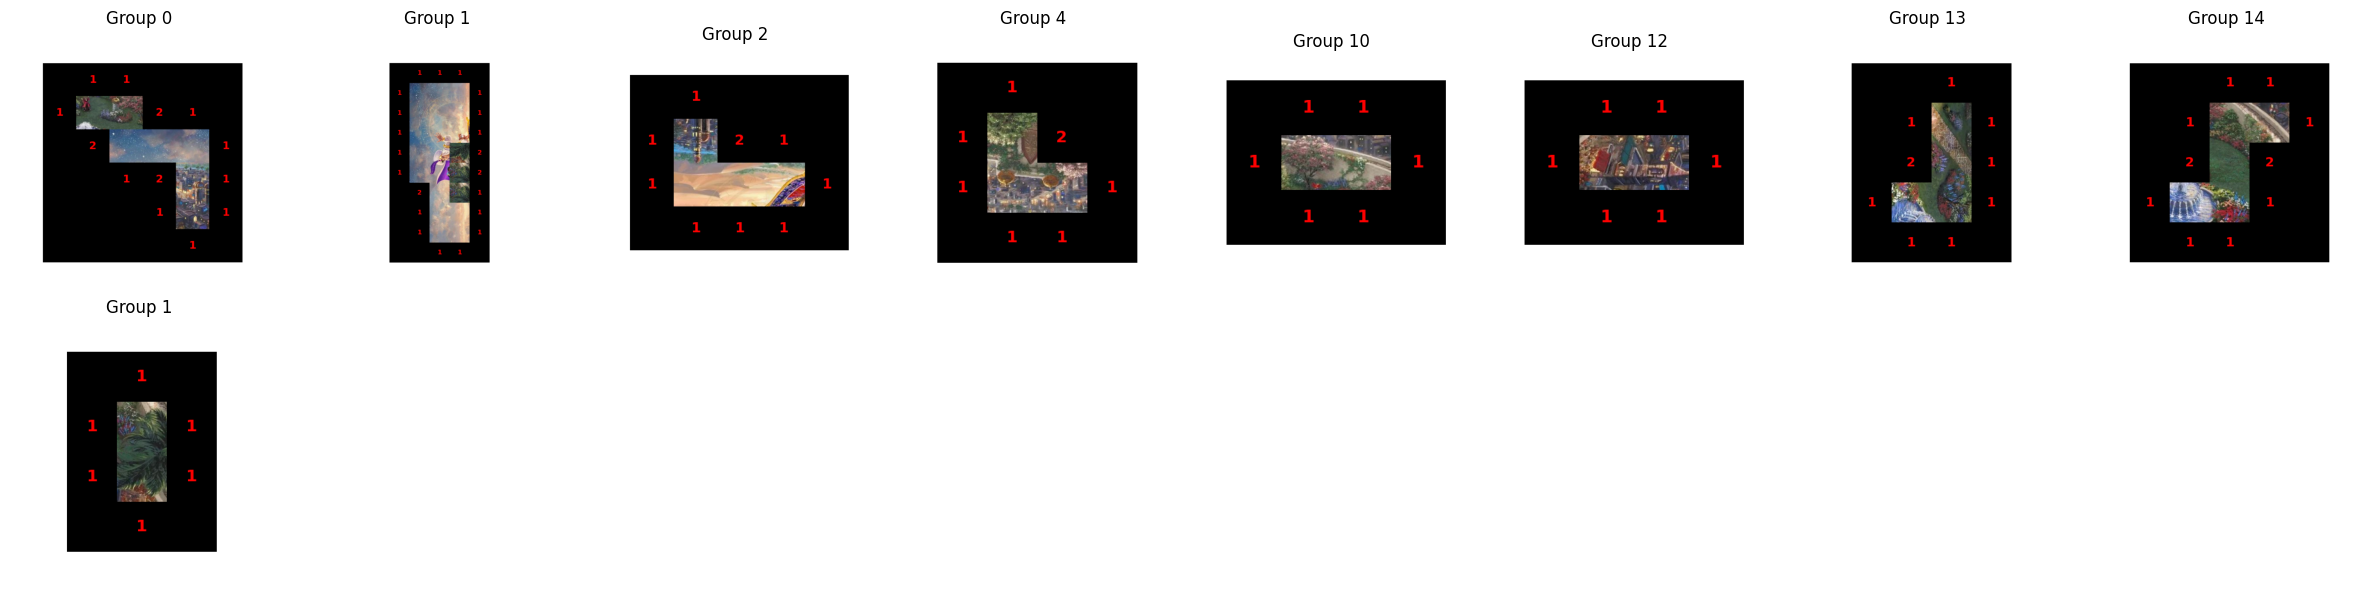

after merge
used fragments anchor: fragment indexes used: [8, 3, 9, 16, 17, 18, 10, 11, 4, 5, 6, 7, 12, 13, 21, 14, 22, 15, 23, 62, 63, 62, 63] at positions: {8: [8, 2], 3: [5, 1], 9: [7, 2], 16: [8, 3], 17: [7, 3], 18: [6, 3], 10: [6, 2], 11: [5, 2], 4: [4, 1], 5: [3, 1], 6: [2, 1], 7: [1, 1], 12: [4, 2], 13: [3, 2], 21: [3, 3], 14: [2, 2], 22: [2, 3], 15: [1, 2], 23: [1, 3], 62: [5, 3], 63: [4, 3]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [5, 3], 63: [4, 3]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 9 with total score: 3755.746895953813 using: Sides Comp: Score=2498.806215196757 Fragment_idx1=33, Side_idx1=0; fragment_idx2=41, side_idx2=0
before merge
used fragments anchor: fragment indexes used: [33, 34, 42] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [2, 2], 63: [1, 2]}
simulating me

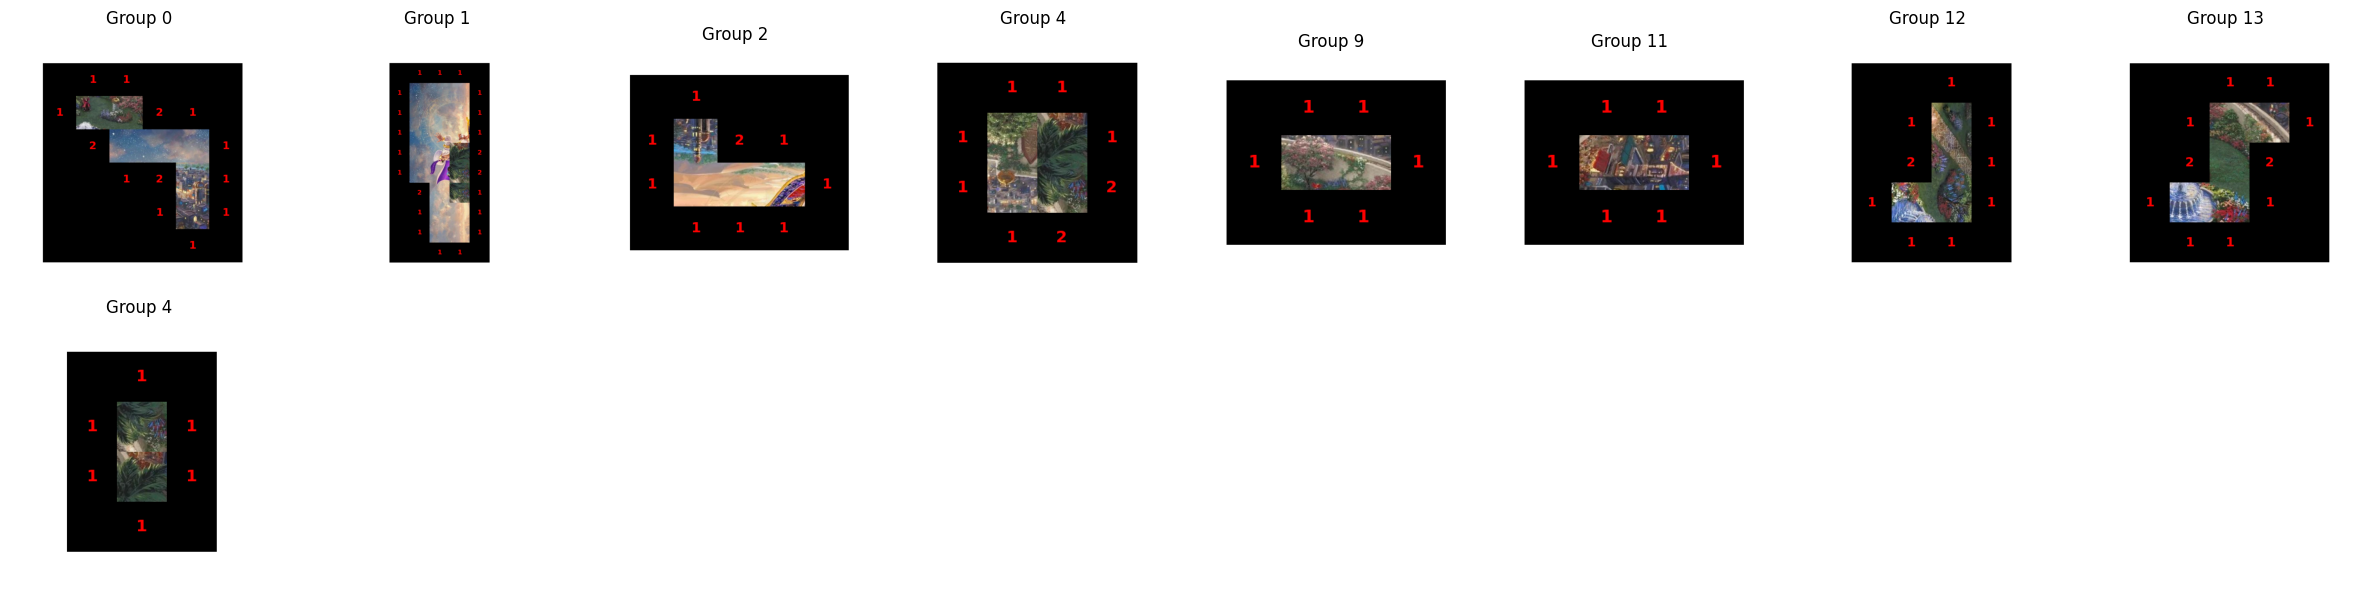

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [2, 2], 63: [1, 2]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [2, 2], 63: [1, 2]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 9 with total score: 0.5948989446889902 using: Sides Comp: Score=0.5948989446889902 Fragment_idx1=62, Side_idx1=3; fragment_idx2=43, side_idx2=2
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [2, 2], 63: [1, 2]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [2, 4], 63: [2, 3]}
simulating merge:


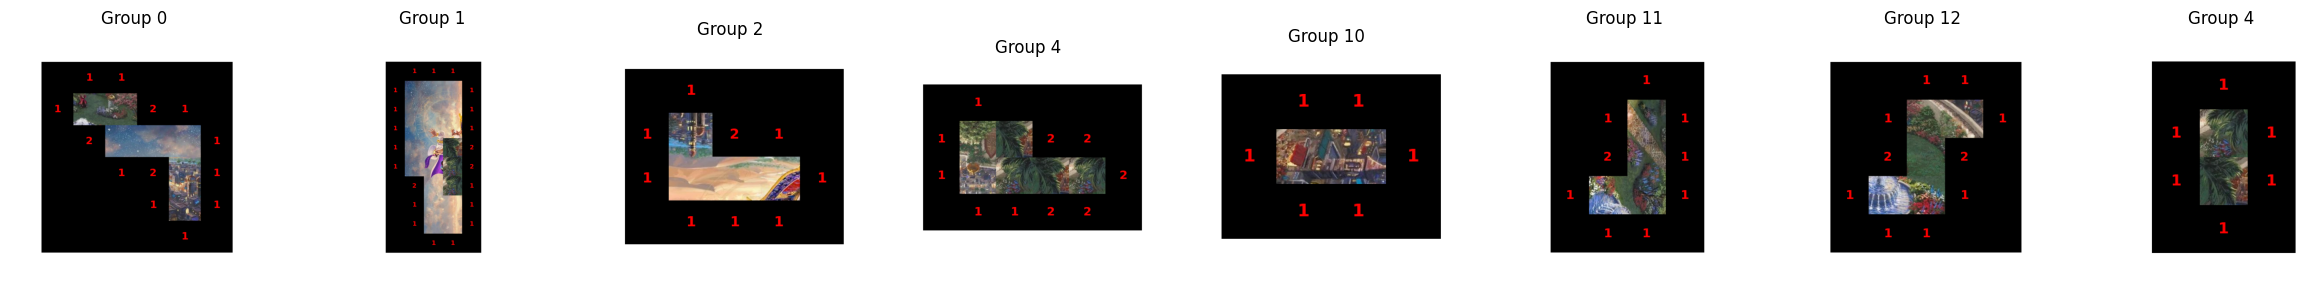

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [2, 4], 63: [2, 3]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [2, 4], 63: [2, 3]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 15 with total score: 0.11163486483159593 using: Sides Comp: Score=0.11163486483159595 Fragment_idx1=62, Side_idx1=2; fragment_idx2=63, side_idx2=3
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [2, 4], 63: [2, 3]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [1, 5], 63: [2, 5]}
simulating merge:


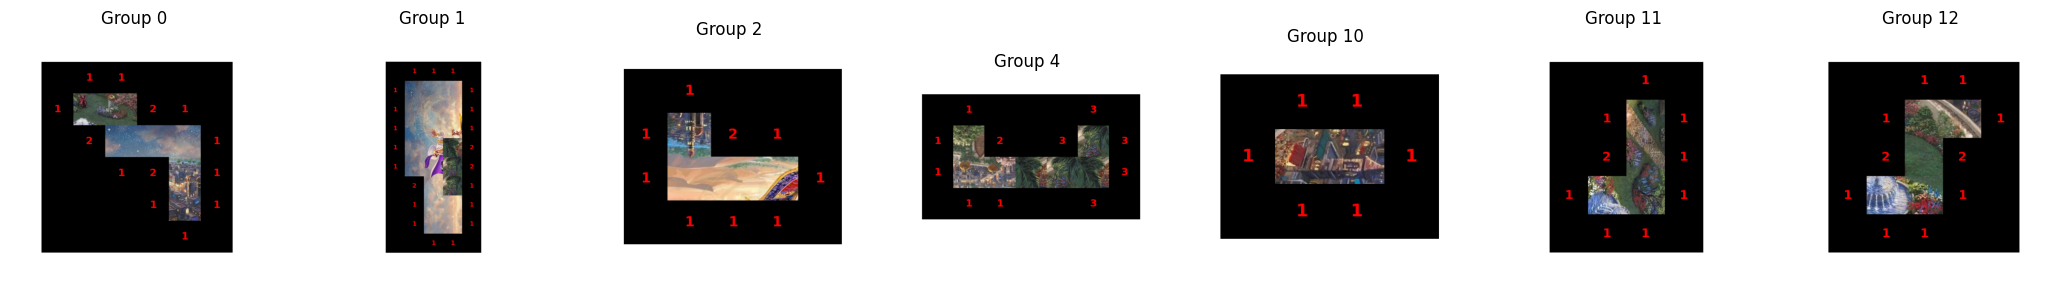

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5]}
used fragments pasted: fragment indexes used: [62, 63] at positions: {62: [1, 5], 63: [2, 5]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 10 with total score: 3.760740551229352 using: Sides Comp: Score=3.7617912481095384 Fragment_idx1=63, Side_idx1=1; fragment_idx2=55, side_idx2=2
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5]}
used fragments pasted: fragment indexes used: [57] at positions: {57: [2, 6]}
simulating merge:


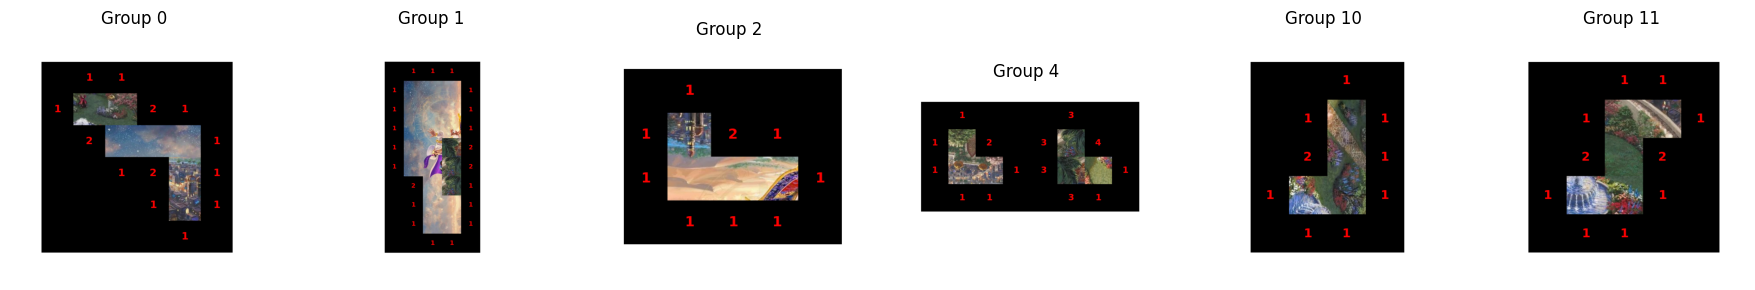

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6]}
used fragments pasted: fragment indexes used: [57] at positions: {57: [2, 6]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 9 with total score: 395617040602.7518 using: Sides Comp: Score=1394465483554.3625 Fragment_idx1=57, Side_idx1=0; fragment_idx2=45, side_idx2=0
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [1, 6]}
simulating merge:


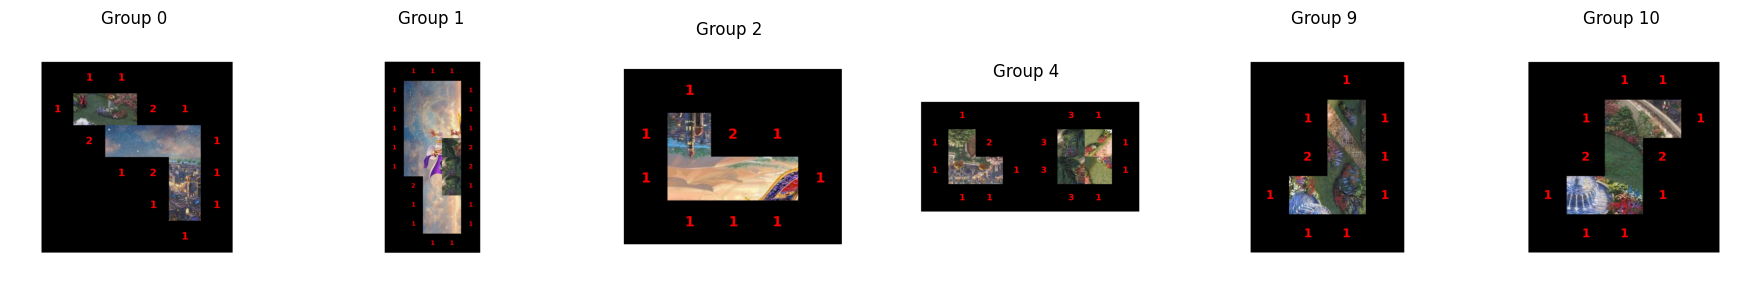

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [1, 6]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [1, 6]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 9 with total score: 2.219742568737357 using: Sides Comp: Score=2.2197425687373564 Fragment_idx1=63, Side_idx1=3; fragment_idx2=48, side_idx2=1
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [1, 6]}
used fragments pasted: fragment indexes used: [57] at positions: {57: [2, 4]}
simulating merge:


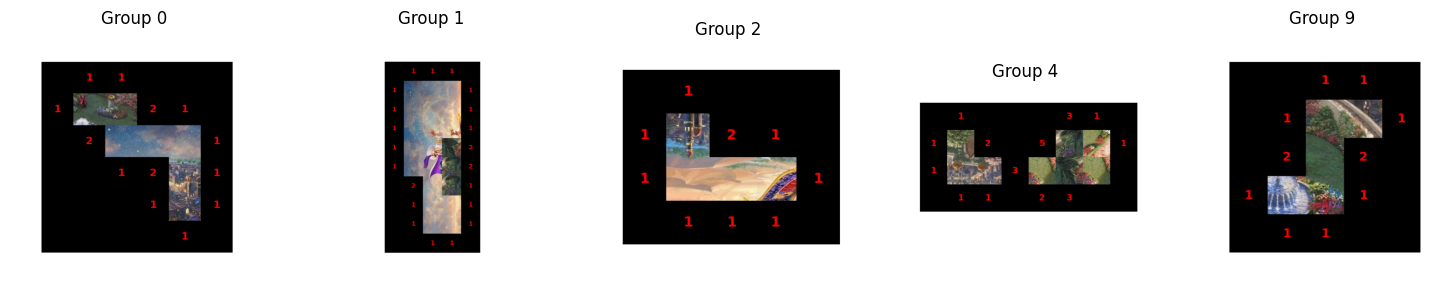

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 4], 56: [1, 6]}
used fragments pasted: fragment indexes used: [57] at positions: {57: [2, 4]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 5 with total score: 9.507802716667732e+18 using: Sides Comp: Score=1.9013261014559412e+19 Fragment_idx1=62, Side_idx1=0; fragment_idx2=35, side_idx2=1
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 4], 56: [1, 6]}
used fragments pasted: fragment indexes used: [57] at positions: {57: [1, 4]}
simulating merge:


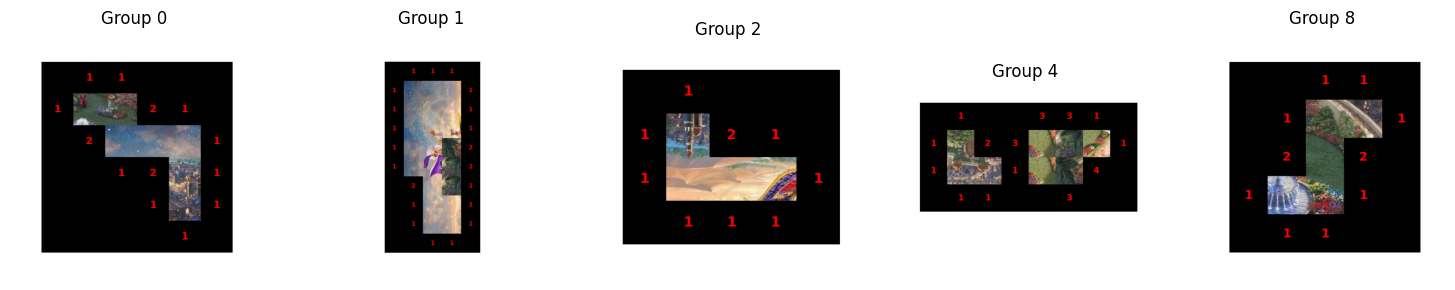

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [1, 4], 56: [1, 6]}
used fragments pasted: fragment indexes used: [57] at positions: {57: [1, 4]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 10 with total score: 1.000125696017341e+21 using: Sides Comp: Score=2.0002035179033348e+21 Fragment_idx1=56, Side_idx1=3; fragment_idx2=57, side_idx2=2
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [1, 4], 56: [1, 6]}
used fragments pasted: fragment indexes used: [57] at positions: {57: [2, 6]}
simulating merge:


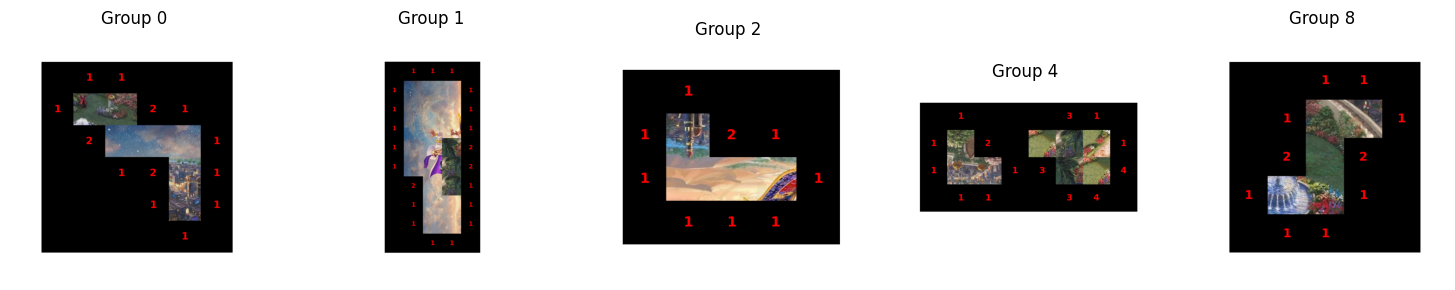

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [1, 6]}
used fragments pasted: fragment indexes used: [57] at positions: {57: [2, 6]}
--------------------------------------------------------------------------------------------------------------
Merged group 4 and 3 with total score: 308062564361812.9 using: Sides Comp: Score=924561749394273.8 Fragment_idx1=57, Side_idx1=0; fragment_idx2=32, side_idx2=0
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [1, 6]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [2, 7]}
simulating merge:


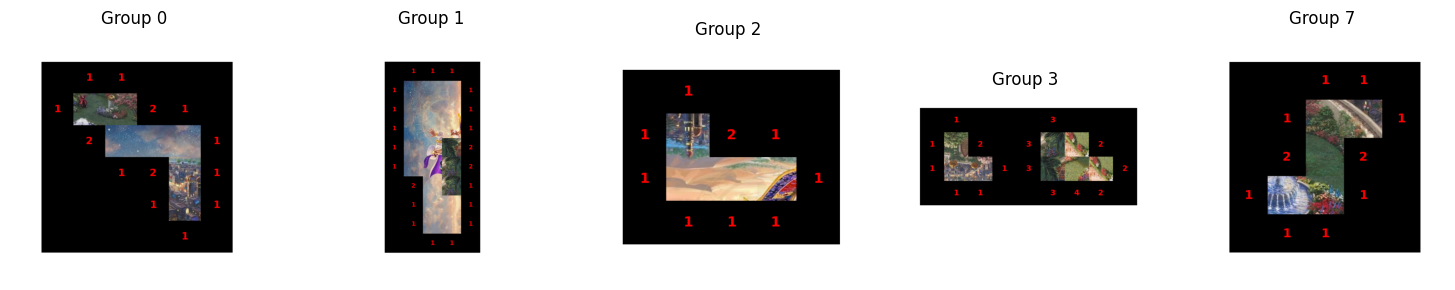

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [2, 7]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [2, 7]}
--------------------------------------------------------------------------------------------------------------
Merged group 3 and 4 with total score: 660421325018958.8 using: Sides Comp: Score=73223169800674.36 Fragment_idx1=57, Side_idx1=1; fragment_idx2=36, side_idx2=1
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [2, 7]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [3, 6]}
simulating merge:


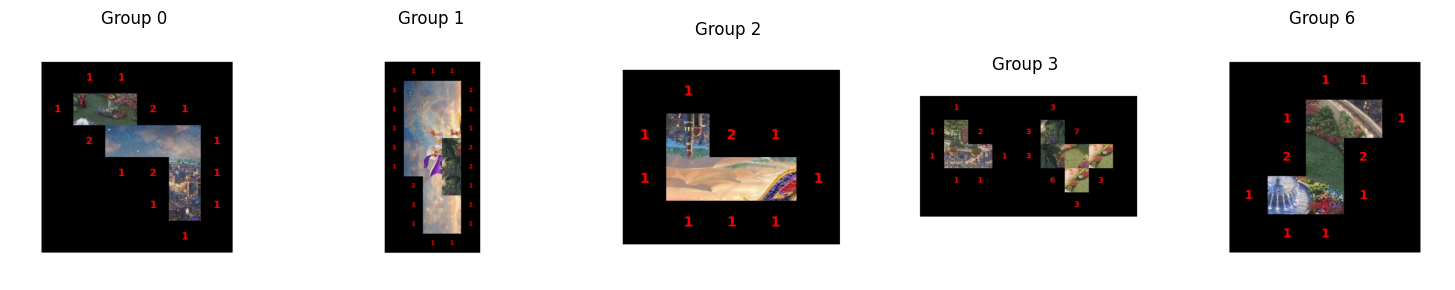

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [3, 6]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [3, 6]}
--------------------------------------------------------------------------------------------------------------
Merged group 3 and 5 with total score: 1840232743153.1216 using: Sides Comp: Score=3680464511063.609 Fragment_idx1=57, Side_idx1=3; fragment_idx2=40, side_idx2=1
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [3, 6]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [1, 6]}
simulating merge:


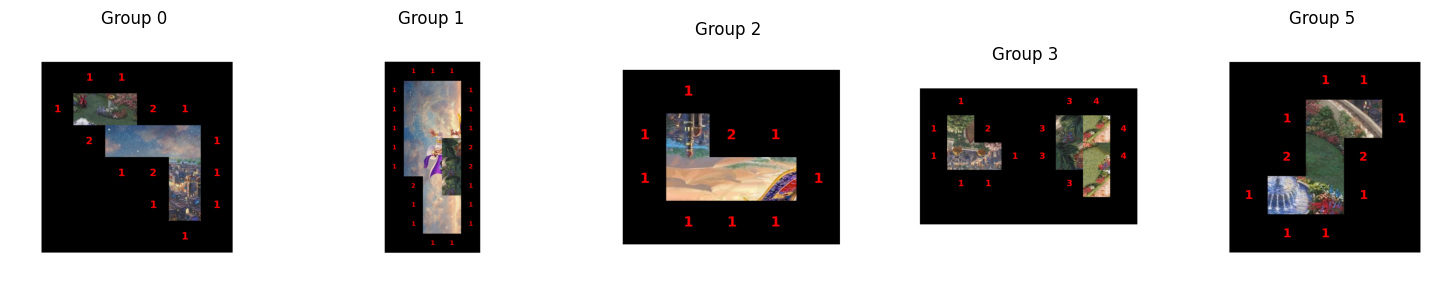

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56] at positions: {33: [2, 2], 34: [2, 1], 42: [1, 1], 62: [1, 5], 63: [2, 5], 57: [2, 6], 56: [1, 6]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [1, 6]}
--------------------------------------------------------------------------------------------------------------
Merged group 3 and 0 with total score: 8582605276611.146 using: Sides Comp: Score=6339725038272652.0 Fragment_idx1=56, Side_idx1=1; fragment_idx2=0, side_idx2=2
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [3, 6]}
used fragments pasted: fragment indexes used: [53, 54, 59, 60, 61] at positions: {53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: [2, 6]}
simulating merge:


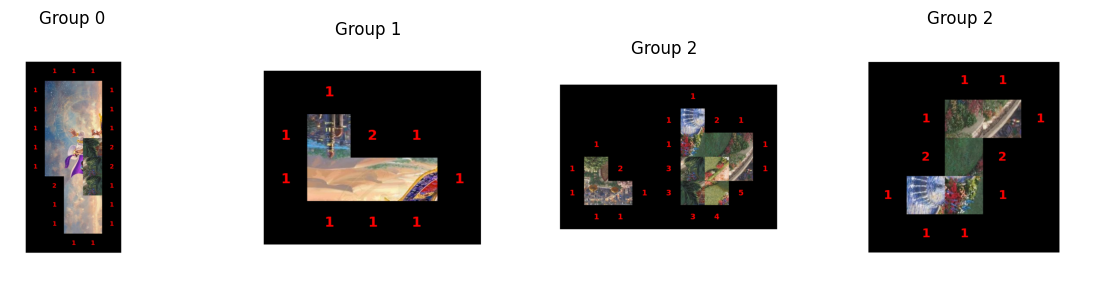

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56, 53, 54, 59, 60, 61] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [3, 6], 53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: [2, 6]}
used fragments pasted: fragment indexes used: [53, 54, 59, 60, 61] at positions: {53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: [2, 6]}
--------------------------------------------------------------------------------------------------------------
Merged group 2 and 4 with total score: 4.133297631271304e+20 using: Sides Comp: Score=8.26659521074804e+20 Fragment_idx1=54, Side_idx1=1; fragment_idx2=53, side_idx2=3
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56, 53, 54, 59, 60, 61] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [3, 6], 53: [2, 7], 54: [3, 7], 59

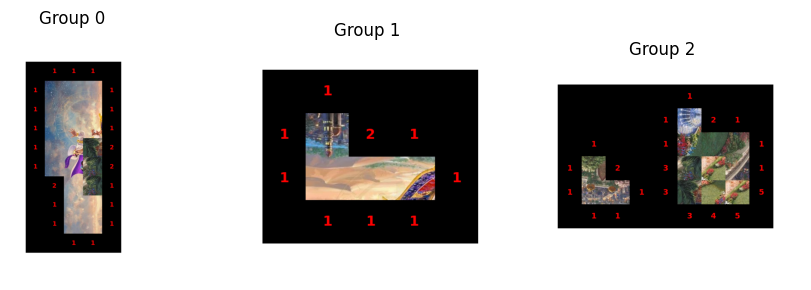

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56, 53, 54, 59, 60, 61, 56] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [4, 7], 53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: [2, 6]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [4, 7]}
--------------------------------------------------------------------------------------------------------------
Merged group 2 and 3 with total score: 569537365719942.0 using: Sides Comp: Score=1.3998210895043822e+17 Fragment_idx1=56, Side_idx1=1; fragment_idx2=37, side_idx2=2
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56, 53, 54, 59, 60, 61, 56] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [4, 7], 53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: [2, 6]}
used fragments pasted: f

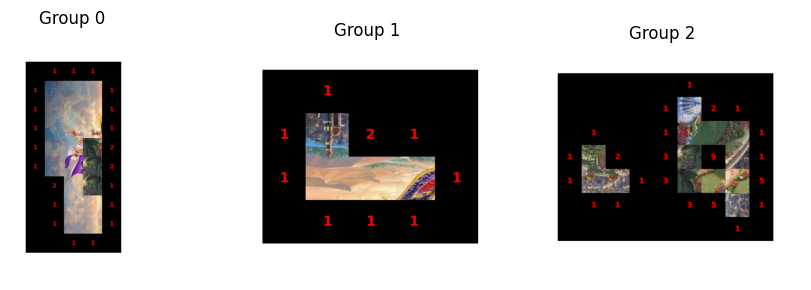

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56, 53, 54, 59, 60, 61, 56, 37] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [4, 7], 53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: [2, 6], 37: [5, 7]}
used fragments pasted: fragment indexes used: [37] at positions: {37: [5, 7]}
--------------------------------------------------------------------------------------------------------------
Merged group 2 and 3 with total score: 2.4185063730467055e+43 using: Sides Comp: Score=9.102739356345881e+38 Fragment_idx1=61, Side_idx1=3; fragment_idx2=56, side_idx2=0
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56, 53, 54, 59, 60, 61, 56, 37] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [4, 7], 53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: [2, 6], 

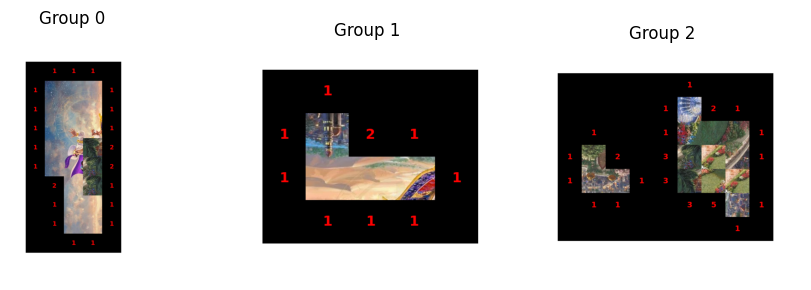

after merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56, 53, 54, 59, 60, 61, 56, 37, 56] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [3, 6], 53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: [2, 6], 37: [5, 7]}
used fragments pasted: fragment indexes used: [56] at positions: {56: [3, 6]}
--------------------------------------------------------------------------------------------------------------
Merged group 2 and 1 with total score: 1.1529805284000872e+32 using: Sides Comp: Score=1.417907053880246e+30 Fragment_idx1=57, Side_idx1=1; fragment_idx2=39, side_idx2=0
before merge
used fragments anchor: fragment indexes used: [33, 34, 42, 62, 63, 62, 63, 62, 63, 57, 56, 57, 57, 57, 56, 56, 56, 53, 54, 59, 60, 61, 56, 37, 56] at positions: {33: [4, 2], 34: [4, 1], 42: [3, 1], 62: [3, 5], 63: [4, 5], 57: [4, 6], 56: [3, 6], 53: [2, 7], 54: [3, 7], 59: [1, 5], 60: [2, 5], 61: 

IndexError: list index out of range

In [10]:
groups, fragments, fragment_idx_to_group_idx = solve_groups(groups, fragments, fragment_idx_to_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 0)

for g in groups:
    print(f"group rows: {g.row_nr} cols: {g.col_nr}")
